# Gym Crowdedness Analysis

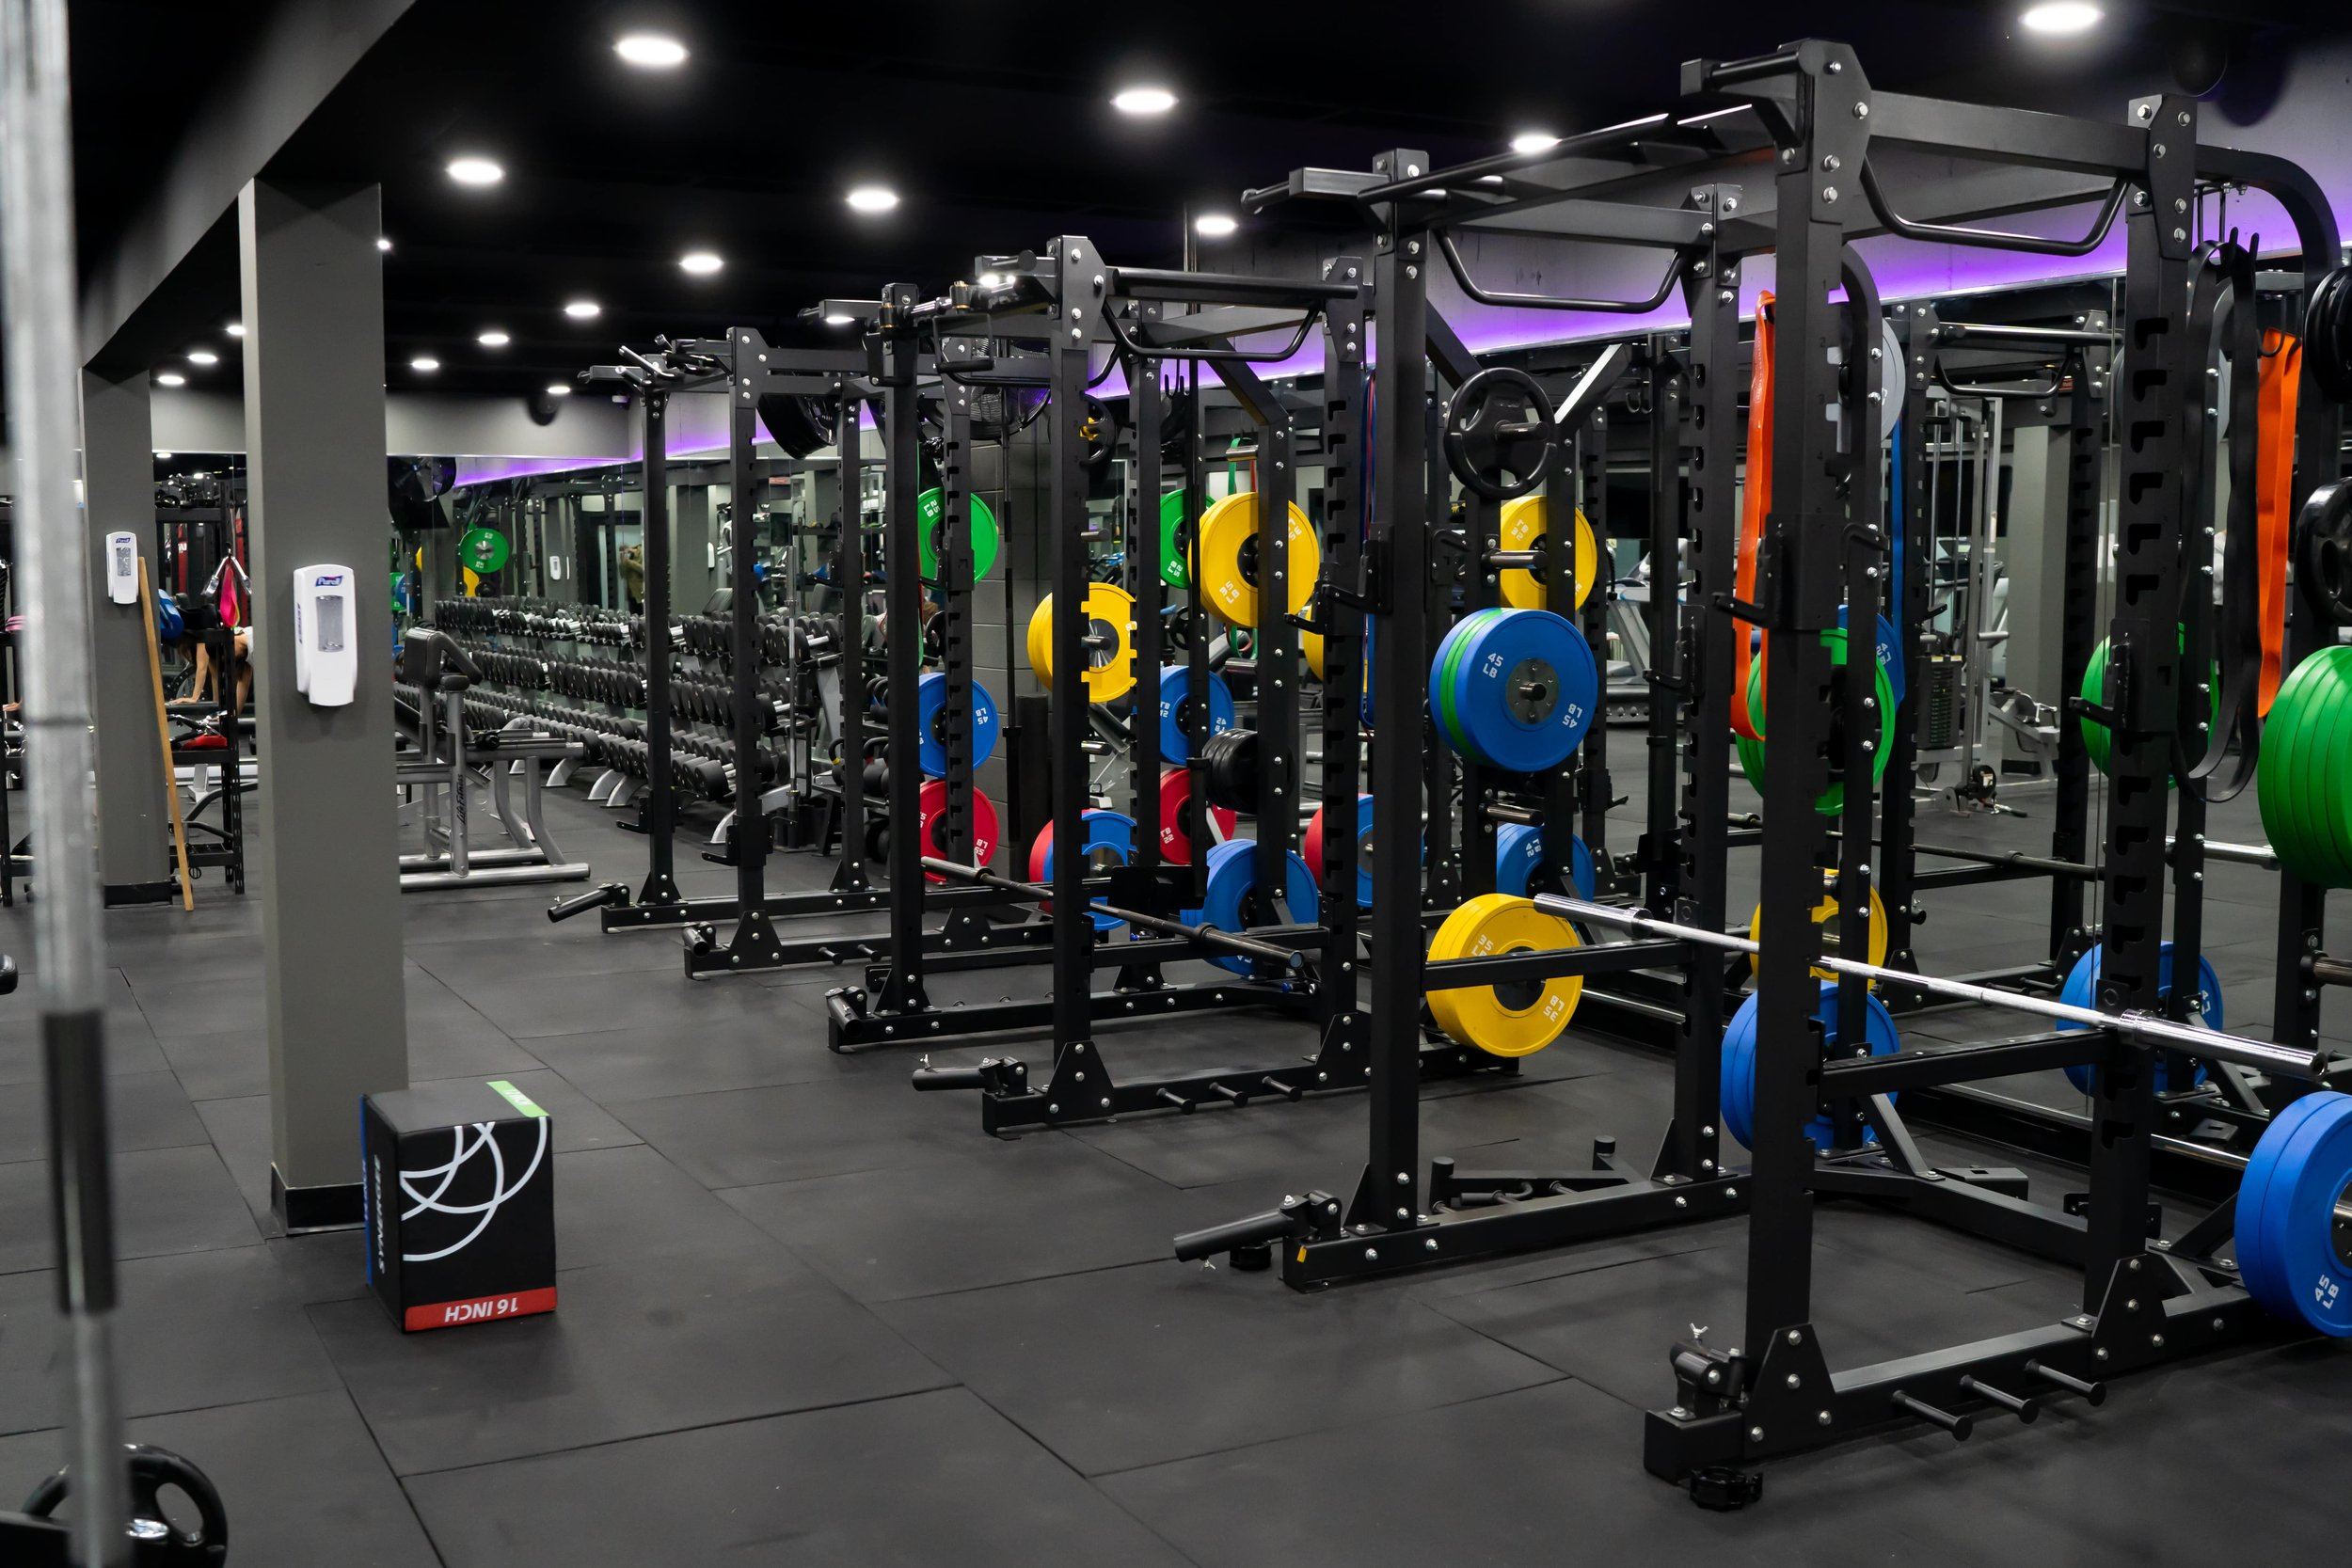

One thing that determines if I have a good workout on any given day is how crowded the gym was when I went. A busy gym can be chaotic and anxiety inducing, and often making me feel like I'm in people's way. Even worse is the fact that almost every machine I'd want to use on a busy day would be taken, decreasing the effectiveness of my workout. It is therefore essential for me to avoid peak hours at the gym. 

In this analysis, I aim to identify the factors that contribute most to crowdedness at a university gym. My second goal is to build a reliable prediction model to determine whether the gym will be crowded based on various factors, such as the time of day, progression into the semester, and more.

In [16]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import os

## Data
The dataset consists of 26,000 people counts (about every 10 minutes) taken over the course of one year at a gym located in UC Berkley. The dataset contains information including weather and semester-specific information that might affect how crowded it is.

*Target Variable* : Number of people at the gym

## Features Description:

- *date* : datetime of data)

- *timestamp* : number of seconds since beginning of day)

- *day_of_week* : 0 (monday) - 6 (sunday)

- *is_weekend* : boolean, with 1 suggesting it is either saturday or sunday, otherwise 0

- *is_holiday* : boolean, with 1 suggesting it is a federal holiday, 0 otherwise

- *temperature* : degrees fahrenheit

- *is_start_of_semester* : boolean, with 1 representing the beginning of a school semester, 0 otherwise

- *month* : 1 (January) - 12 (December)

- *hour* : 0 - 23

In [14]:
# Downloading latest version of data
path = kagglehub.dataset_download("nsrose7224/crowdedness-at-the-campus-gym")
file_path = os.path.join(path, "data.csv")
df = pd.read_csv(file_path)
df.head()

number_people                       date  timestamp  day_of_week  \
0             37  2015-08-14 17:00:11-07:00      61211            4   
1             45  2015-08-14 17:20:14-07:00      62414            4   
2             40  2015-08-14 17:30:15-07:00      63015            4   
3             44  2015-08-14 17:40:16-07:00      63616            4   
4             45  2015-08-14 17:50:17-07:00      64217            4   

   is_weekend  is_holiday  temperature  is_start_of_semester  \
0           0           0        71.76                     0   
1           0           0        71.76                     0   
2           0           0        71.76                     0   
3           0           0        71.76                     0   
4           0           0        71.76                     0   

   is_during_semester  month  hour  
0                   0      8    17  
1                   0      8    17  
2                   0      8    17  
3                   0      8    17  
4                   0      8    17

In [15]:
df.describe()

number_people     timestamp   day_of_week    is_weekend    is_holiday  \
count   62184.000000  62184.000000  62184.000000  62184.000000  62184.000000   
mean       29.072543  45799.437958      2.982504      0.282870      0.002573   
std        22.689026  24211.275891      1.996825      0.450398      0.050660   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         9.000000  26624.000000      1.000000      0.000000      0.000000   
50%        28.000000  46522.500000      3.000000      0.000000      0.000000   
75%        43.000000  66612.000000      5.000000      1.000000      0.000000   
max       145.000000  86399.000000      6.000000      1.000000      1.000000   

        temperature  is_start_of_semester  is_during_semester         month  \
count  62184.000000          62184.000000        62184.000000  62184.000000   
mean      58.557108              0.078831            0.660218      7.439824   
std        6.316396              0.269476            0.473639      3.445069   
min       38.140000              0.000000            0.000000      1.000000   
25%       55.000000              0.000000            0.000000      5.000000   
50%       58.340000              0.000000            1.000000      8.000000   
75%       62.280000              0.000000            1.000000     10.000000   
max       87.170000              1.000000            1.000000     12.000000   

               hour  
count  62184.000000  
mean      12.236460  
std        6.717631  
min        0.000000  
25%        7.000000  
50%       12.000000  
75%       18.000000  
max       23.000000